In [15]:
import pandas as pd
cleaned_data = pd.read_excel('clean_data_relevant.xlsx')

In [16]:
cleaned_data

,Unnamed: 0,BROKER,LATITUDE,LONGITUDE,TYPE,BOROUGH,NEIGHBOURHOOD,BEDS,POSTCODE,BATH,PROPERTYSQFT,PRICE
0,0,277,0.633396,0.505918,2,1,264,0.166667,18,0.2,0.134948,315000
1,1,844,0.102276,0.103390,6,3,259,0.333333,54,0.2,0.205882,260000
2,2,217,0.633742,0.505683,2,1,264,0.250000,18,0.1,0.024798,69000
3,3,844,0.423098,0.534539,6,0,192,0.416667,127,0.2,0.435294,690000
4,4,277,0.750035,0.556240,2,1,264,0.166667,23,0.2,0.225399,899500
...,...,...,...,...,...,...,...,...,...,...,...,...
4501,4501,217,0.665089,0.539708,0,1,263,0.083333,40,0.1,0.225399,599000
4502,4502,591,0.563894,0.713574,0,2,196,0.083333,147,0.1,0.225399,245000
4503,4503,277,0.596189,0.453402,0,1,264,0.083333,9,0.1,0.225399,1275000
4504,4504,288,0.588660,0.690689,2,2,91,0.166667,146,0.1,0.049020,598125


In [17]:
from sklearn.model_selection import train_test_split

X = cleaned_data.drop(columns='PRICE')
y = cleaned_data['PRICE']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression, HuberRegressor

reg = LinearRegression().fit(X_train, y_train)

print('Coef: ',reg.coef_)
print('intercept_', reg.intercept_)

Coef:  [-2.62662002e+01  4.24832500e+01  1.06273516e+06  4.69906579e+05
 -6.05030269e+04 -3.92187261e+05  2.54220037e+03 -2.47245377e+06
 -1.27279034e+04  9.00825889e+06  8.25126303e+06]
intercept_ -556946.2474463198


In [20]:
y_pred = reg.predict(X_test)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
import numpy as np

print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.3507572464771538
Mean Absolute Error: 1338345.034873028
Median Absolute Error: 779480.9058892394
Mean Squared Error: 6800512913069.284
Root Mean Squared Error: 2607779.306818214


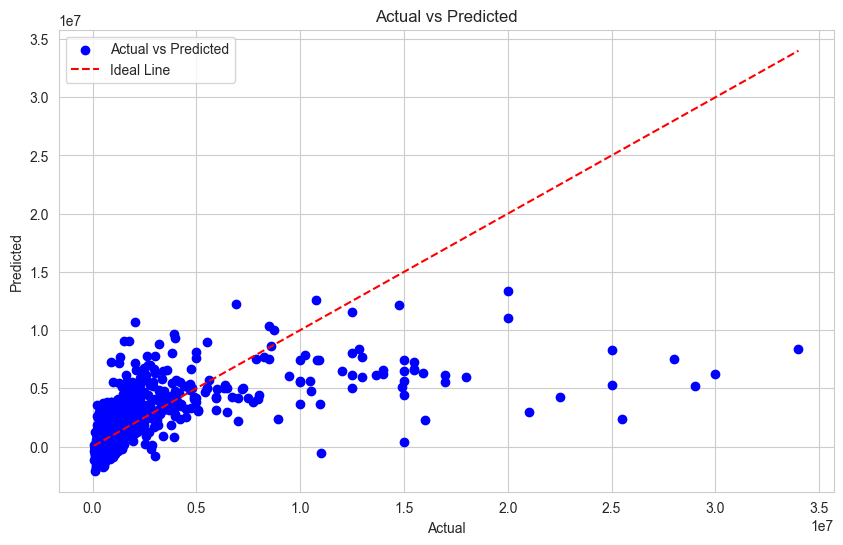

In [22]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [23]:
huber = HuberRegressor().fit(X_train, y_train)
y_pred = huber.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.021904624217182644
Mean Absolute Error: 1151054.1453237287
Median Absolute Error: 354408.0847179651
Mean Squared Error: 10245089678910.588
Root Mean Squared Error: 3200795.1635352406


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


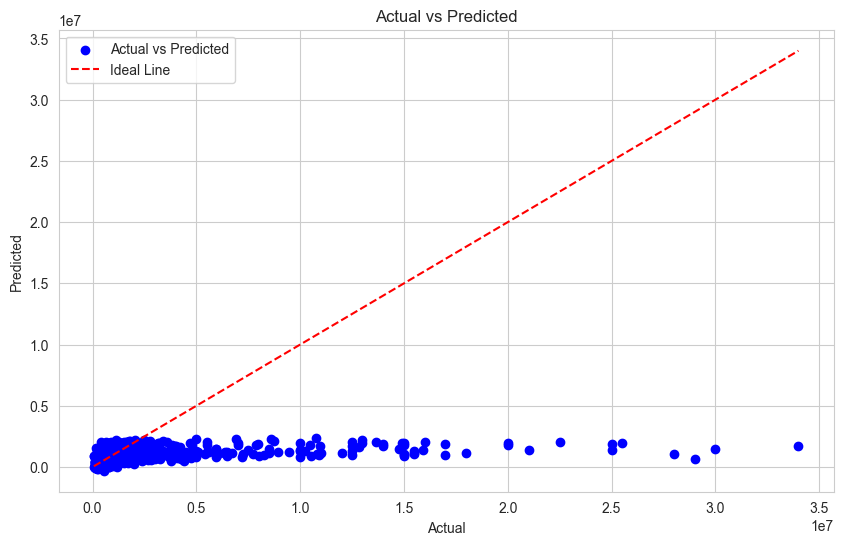

In [24]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
model1.coef_